In [114]:
import numpy as np
import dfdt
import matplotlib.pyplot as plt
import scipy

(7680, 4096)


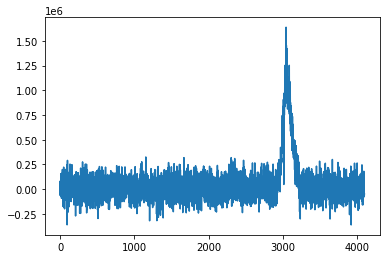

In [115]:
fname_test = "./dfdt/data/23891929_DM348.8_waterfall.npy"
fname = "../scintillation/B_686_dm348.8.fits.npy"
dedispersed_intensity = np.flipud(np.load(fname))
#dedispersed_intensity = np.flipud(dedispersed_intensity_nc[:, 0:1000])
print(dedispersed_intensity.shape)
#plt.imshow(dedispersed_intensity, aspect = 'auto')
plt.plot(dedispersed_intensity.sum(0))

In [116]:
# burst parameters
dm_uncertainty = 0.2  # pc cm-3
source = "R3"
eventid = "1"

## instrument parameters
#dt_s = 0.00098304
#df_mhz = 0.0244140625
#nchan = 16384
#freq_bottom_mhz = 400.1953125
#freq_top_mhz = 800.1953125

# instrument parameters
dt_s = float(0.083333)/dedispersed_intensity.shape[1]
print(dt_s)
df_mhz = float(400)/dedispersed_intensity.shape[0]
print(df_mhz)
nchan = dedispersed_intensity.shape[0]
print(nchan)
freq_bottom_mhz = float(600)
freq_top_mhz = float(1000)


2.0344970703125e-05
0.052083333333333336
7680


In [117]:
ds = dfdt.DynamicSpectrum(dt_s, df_mhz, nchan, freq_bottom_mhz, freq_top_mhz)
#try:
constrained, dfdt_data, dfdt_mc, dfdt_mc_low, dfdt_mc_high = dfdt.ac_mc_drift(
    dedispersed_intensity, dm_uncertainty, source, eventid, ds,
    dm_trials=100, mc_trials=100
)
#except ValueError:
#    print('Note: ValueError')
#    pass

R3 -- 1 -- Analyzing..


/Users/jakobfaber/.pyenv/versions/3.7.3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R3 -- 1 -- df/dt (data) = 0.03 MHz/ms
R3 -- 1 -- Resampling data..


KeyboardInterrupt: 